# Differential Calculus: From scalar to matrix functions

Differential Calculus is a branch of mathematics that has been developed for about the last 400 years, starting with Newton and Leibniz in Europe and furtherly generalized and formalized by several mathematicians from all around the world. Today, it is a very useful theory with uncountable apllications in modern math, science and engineering.

This notebook is aimed to people who want to understad the essence of differential calculus in the context of functions with domains and images in subsets of $\mathbb{R}$, $\mathbb{R}^n$ (the space of real vectors of size $n$) and $\mathbb{R}^{m\times n}$ (the space of real matrices of size $m\times n$).

In [3]:
import numpy as np
from itertools import repeat
import matplotlib.pyplot as plt
from math import factorial
from scipy import integrate

## The intuition behind

There are two basic concepts in differential calculus that people tend to mess between, the **differentiability** of a function and its **derivative**.

Basically, **differentiability** is a property that some continuous functions have, namely the **differentiable functions** which in some sense, are somewhat *"smooth"*. In the other hand, the **derivative** of a function is kind of a quantification of such smoothness and is measured with the rates of change of the value of such function when we apply a local perturbation.

## Linear and Multilinear mappings

Given two vector spaces $V,W$ over a field $\mathbb{K}$, we define a **linear mapping** as a function $\phi:V\rightarrow W$ such that for all $v_1,...,v_k\in V$ and $\alpha\in\mathbb{K}$,
$$\phi\left(\sum_{j=1}^kv_j\right) = \sum_{j=1}^k\phi(v_j)$$
$$\phi(\alpha v) = \alpha\phi(v)$$

For example, a linear transformation between $\mathbb{R}^n$ and $\mathbb{R}^m$ is the product $Av$ where $A\in\mathbb{R}^{m\times n}$

In [83]:
def random_array(shape:tuple,n:int=100):
    """Generates a random integer array of arbitrary shape with numbers from 0:n-1"""
    return (n*np.random.rand(*shape)).astype(int)

In [84]:
A = random_array((3,2))
v1 = random_array((2,))
v2 = random_array((2,))
a = np.random.randint(100)

print("v1=",v1,"\nv2=",v2,"\na=",a,"\nA=\n", A)

v1= [69 78] 
v2= [25 79] 
a= 88 
A=
 [[74 26]
 [76 82]
 [29 51]]


In [85]:
(np.dot(A,v1+v2) == np.dot(A,v1) + np.dot(A,v2)).all()

True

In [86]:
(np.dot(A,a*v1) == a*np.dot(A,v1)).all()

True

In this sense, a **multilinear maping** is a a function $\Phi:V_1\times\cdots\times V_k\rightarrow W$ that is linear in all of its $k$ arguments. This is, for all $v_1^{r},\dots,v_{n_r}^{r}\in V_r$ and $\alpha_1,\dots,\alpha_k\in\mathbb{K}$,
$$\Phi\left(\sum_{j_1=1}^{n_1}v_{j_1}^{1},\dots,\sum_{j_k=1}^{n_k}v_{j_k}^{k}\right) = \sum_{j_1=1}^{n_1}\cdots\sum_{j_k=1}^{n_k}\Phi\left(v_{j_1}^{1},\dots,v_{j_k}^{k}\right)$$
$$\Phi\left(\alpha_1 v^1,\dots,\alpha_k v^k\right) = \left(\prod_{j=1}^k\alpha_j\right)\Phi\left(v^1,\dots,v^k\right)$$

In this case, $\phi$ is said to be a $k$-linear mapping.

For example, the Euclidean inner product $\phi:\mathbb{R}^n\times\mathbb{R}^n\rightarrow\mathbb{R}$ given by $\phi(x,y) = \sum_{i=1}^nx_iy_i$ is a bilinear mapping and can be represented by the matrix product $x'y$

In [8]:
def inner_prod(x,y):
    return np.dot(x,y)

In [9]:
n = 2
m = 3
x1,x2,y1,y2 = (random_array((shape,)) for shape in repeat(n,4))
a1,a2 = random_array((2,))

In [10]:
inner_prod(x1+x2,y1+y2) == inner_prod(x1,y1) + inner_prod(x1,y2) + inner_prod(x2,y1) + inner_prod(x2,y2)

True

In [11]:
inner_prod(a1*x1,a2*x2) == (a1*a2) * inner_prod(x1,x2)

True

Hence, the general form of a multilinear mapping is given by

$$\Phi\left(\sum_{j_1=1}^{n_1}\alpha_{j_1}^{1}v_{j_1}^{1},\dots,\sum_{j_k=1}^{n_k}\alpha_{j_n}^{k}v_{j_k}^{k}\right) = \sum_{j_1=1}^{n_1}\cdots\sum_{j_k=1}^{n_k}a_{j_1}^{1}\cdots a_{j_k}^{k}\Phi\left(v_{j_1}^{1},\dots,v_{j_k}^{k}\right)$$

Now, consider the case where $\dim V_r = n_r$ and $\dim W = m$. Let $e_1^{r},\dots,e_{n_r}^{r}$ be a basis of $V_r$ and $\varepsilon_1,\dots,\varepsilon_{m}$ be a basis of $W$ . Hence, for all $v^r\in V_r$ we can form the linear combination $v^r = \sum_{j=1}^{n_r}v_{j}^{r}e^r_j$ for some $v^r_1,\dots,v^{n_r}\in\mathbb{K}$ so that a multilinear mapping $\Phi:V_1\times\cdots\times V_k\rightarrow W$ can be expressed just as a sum of $\Phi$ applied to all the combinations of each basis terms. Define the following linear combination in $W$ for some $\phi^1_{j_1,\dots,j_k},\dots,\phi^m_{j_1,\dots,j_k}\in\mathbb{K}$
$$\Phi\left(e_{j_1}^{1},\dots,e_{j_k}^{k}\right) = \sum_{i=1}^m\phi^{i}_{j_1,\dots,j_k}\varepsilon_i$$
Thus, the basis expansion of a multilinear mapping can be expressed as
$$\Phi\left(v^{1},\dots,v^{k}\right) = \sum_{i=1}^m\sum_{j_1=1}^{n_1}\cdots\sum_{j_k=1}^{n_k}v_{j_1}^{1}\cdots v_{j_k}^{k}\phi^{i}_{j_1,\dots,j_k}\varepsilon_i$$

This formula is the way we will identify and use multilinear mappings in the following sections.

## Differentiability of functions $\mathbb{R}\rightarrow\mathbb{R}$

### Definition

Let $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ be a continuous function in a neighborhood $U\subset\Omega$ of a point $c\in U$. 

We say that $f$ is differentiable at $c$ if and only if $\forall u\in\mathbb{R}:u\neq0\land c+u\in U$ there exists a linear transformation $\Phi:\mathbb{R}\rightarrow\mathbb{R}$ on $u$ such that
$$f(c+u) = f(c) + \Phi(u) + r_c(u)$$
$$\lim_{u\rightarrow 0}\frac{r_c(u)}{u} = 0$$

Under the basis expansion, see that $\Phi(u) = u\phi$. The real number $\phi$ is defined as the **derivative** of $f$ at $c$, and it is the representation of the linear transformation $\Phi$. In addition, the real number $\Phi(u)$ is defined as the **differential** of $f$ at $c$ with increment $u$.


### What is $\Phi$?

By reordering the equation above and dividing both sides by $u$ we get
$$\frac{f(c+u)-f(c)}{u} = \phi + \frac{r_c(u)}{u}$$

If we take the limit when $u\rightarrow 0$ then the second right term vanishes, and thus

$$\phi = \lim_{u\rightarrow 0}\frac{f(c+u)-f(c)}{u}$$

I will denote the derivative as $Df(c)$ and the differential as $df(c;u)$. Thus,

$$df(c;u) = Df(c) u$$

**Note**: The expression for $Df(c)$ is a limit version of the slope equation for the secant line that passes through $\left(c,f(c)\right)$ and $\left(c+u,f(c+u)\right)$. Hence, in this context $Df(c)$ is interpreted as the slope of the tangent line that passes through $(c,f(c))$.

As an example, let's study the function $f(x) = sin^2(x)e^{-x^2}$ at the point $c=0.8$ for a neighborhood $U=(c-\epsilon,c+\epsilon)$ with a *small* $\epsilon>0$ and some $u\in(0,\epsilon)$.

In [12]:
def f(x):
    return np.sin(x)**2*np.exp(-x**2)

def D(f,x,prec:float=1e-8):
    return (f(x+prec) - f(x)) / prec

def d(f,x,u):
    return D(f,x)*u

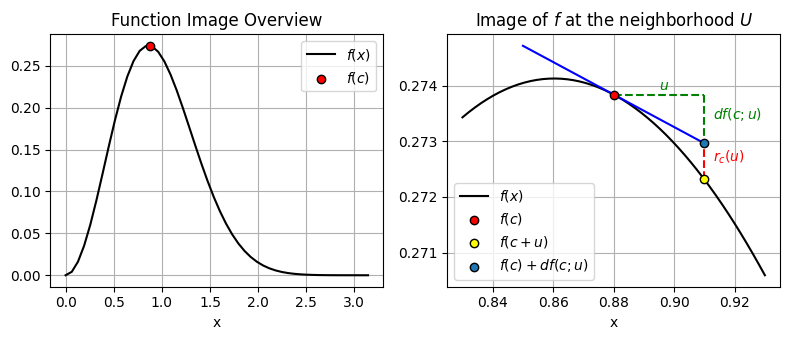

In [13]:
epsilon = 0.05
u = epsilon*0.6
c = 0.88
df = d(f,c,u)
fc = f(c)

fig,ax = plt.subplots(1,2,figsize=(8,3.5),dpi=100)
x_ = np.linspace(0,np.pi,50)
ax[0].plot(x_,f(x_),color="black",label=r"$f(x)$",zorder=1)
ax[0].scatter(c,f(c),c="red",edgecolors="black",label=r"$f(c)$",zorder=2)
ax[0].set_title("Function Image Overview")
ax[0].grid()
ax[0].set_axisbelow(True)
ax[0].set_xlabel("x")
ax[0].legend()
x_ = np.linspace(c-epsilon,c+epsilon,50)
ax[1].plot(x_,f(x_),color="black",label=r"$f(x)$",zorder=1)
ax[1].plot([c,c+u],[fc,fc],color="green",linestyle="--")
ax[1].plot([c+u,c+u],[fc,fc+df],color="green",linestyle="--")
ax[1].plot([c-u,c+u],[fc-df,fc+df],color="blue",linestyle="-")
ax[1].plot([c+u,c+u],[f(c+u),fc+df],color="red",linestyle="--")
ax[1].scatter(c,fc,c="red",edgecolors="black",label=r"$f(c)$",zorder=2)
ax[1].scatter(c+u,f(c+u),c="yellow",edgecolors="black",label=r"$f(c+u)$",zorder=2)
ax[1].scatter(c+u,fc+df,c="tab:blue",edgecolors="black",label=r"$f(c)+df(c;u)$",zorder=2)
ax[1].text(c+u*1.1,fc+df/2,r"$df(c;u)$",color="green")
ax[1].text(c+u/2,f(c)-df*0.1,r"$u$",color="green")
ax[1].text(c+u*1.1,(fc+df+f(c+u))/2,r"$r_c(u)$",color="red")
ax[1].set_title(r"Image of $f$ at the neighborhood $U$")
ax[1].grid()
ax[1].set_axisbelow(True)
ax[1].set_xlabel("x")
ax[1].legend()
plt.tight_layout()
plt.show()

Note that $f(c) + df(c;u)$ is a good approximation to $f(c+u)$ when $u$ is *small*. This last thing is the idea behind differential calculus and how it generalizes to more complex spaces. 

**Note:** Try modifying the values of $c,\epsilon,u$ and see what happens!

### The derivative as an operator

We say that a function $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ is differentiable at some set $U\subset\Omega$ if it is differentiable at all points in $U$. In the case $U=\Omega$ we just say that $f$ is differentiable.

Given a differentiable function $f$ in some set $U\subset\mathbb{R}$ it is intuitive to define a function $h:U\rightarrow\mathbb{R}$ such that $h(x)=Df(x)$, this is called the **derivative function** of $f$. In this sense, we may interpret the derivative $Df(c)$ rather than just as a number, but as the value of the derivative function $Df$ at some point $c\in U$. Hence, it is natural to define the **differntiation opperator** $D$ as the one that generates the mapping $D:f\mapsto Df$ for all differentiable functions on their respective domains (i.e. where such functions are differentiable).

**Note**: It can be easily proven that such operator is linear.

### The mean value theorem

This is probably one of the most useful theormes all along differential calculus, so let's state it and give an example.

Let $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ be continuous at some closed set $[a,b]\subset\Omega$ and differentiable at its interior $(a,b)$. Then there exists a value $\xi\in(a,b)$ such that 
$$Df(\xi) = \frac{f(b)-f(a)}{b-a}$$

For example, the sigmoid function $\sigma(x) = 1/(1-e^{-x})$ is continuous and differentiable. Thus, we can test the mean value theorem by just selecting some $a$ and $b$.

In [14]:
def f(x):
    return 1/(1+np.exp(-x))

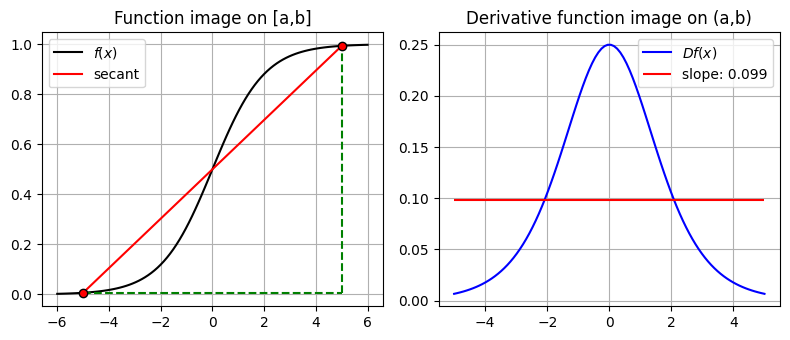

In [15]:
a = -5
b = 5
assert a < b
fa = f(a)
fb = f(b)
slope = (fb-fa)/(b-a)

fig,ax = plt.subplots(1,2,figsize=(8,3.5),dpi=100)
x_ = np.linspace(a-0.1*(b-a),b+0.1*(b-a),100)
ax[0].plot(x_,f(x_),color="black",label=r"$f(x)$")
ax[0].hlines(fa,a,b,color="green",linestyle="--")
ax[0].vlines(b,fa,fb,color="green",linestyle="--")
ax[0].plot([a,b],[fa,fb],color="red",label="secant")
ax[0].scatter([a,b],[fa,fb],color="red",marker="o",edgecolor="black",zorder=2)
ax[0].grid()
ax[0].legend()
ax[0].set_title(r"Function image on [a,b]")
x_ = np.linspace(a,b,100)
ax[1].plot(x_,D(f,x_),color="blue",label=r"$Df(x)$")
ax[1].hlines(slope,a,b,color="red",label=f"slope: {round(slope,3)}")
ax[1].plot()
ax[1].grid()
ax[1].legend()
ax[1].set_title(r"Derivative function image on (a,b)")
plt.tight_layout()
plt.show()

We can see the existance of the point $\xi$ by the intersection of the blue and red lines. Feel free to modify $a$ and $b$!

### Continous differentiability

Let $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ be differentiable at $U\subset\Omega$ and $g:U\rightarrow\mathbb{R}$ such that $g(x)=df(x;u)$. If $g$ is continuous at some $c\in U$ we say that $f$ is **continuously differentiable** at $c$, if $g$ is continuous on $V\subset U$ then $f$ is said to be continuously differentiable at $V$ and if $f$ is differentiable and $g$ is continuous then $f$ is just said to be continuously differentiable. 

**Note**: Define $\mathcal{C}^1$ as the set of all continuously differentiable functions at some set, which may be mentioned explicityly, but if it is not, you may assume that it is the function's domain.

### Some useful theorems

There are several theorems that derive from the ideas discussed above that I will not prove in this notebook, but are covered in a Calculus 1 or Real Analysis course / book. Nevertheless I will mention some important ones.

Let $\lambda\in\mathbb{R}$ and $f,g:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ be differentiable at a point $c\in\Omega$.

* $d(\lambda f)(c;u) = \lambda df(c;u)$
* $d(f+g)(c;u) = df(c;u) + dg(c;u)$
* $d(fg)(c;u) = df(c;u)g(c) + f(c)dg(c;u)$
* $d(f/g)(c;u) = \left(df(c;u)g(c) - f(c)dg(c;u)\right)\ /\ g(c)^{-2}$ if and only if $g(c)\neq 0$

There is a very important result, namely the **Chain Rule** which states that if $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ and $g:\Gamma\subset\mathbb{R}\rightarrow\mathbb{R}$ such that $g$ is differentiable at a point $c\in\Gamma$ and there exists a neigborhood $U$ of $g(c)$ such that $U\subset\Omega$ where $f$ is continuous and $f$ is differentiable at $g(c)$ then

$$d(f\circ g)(c;u) = Df\left(g(c)\right) dg(c;u)$$

In [16]:
def f(x):
    return 2*np.sin(x)

def g(x):
    return x**2 + 4*x - 2

In [17]:
c = 3
u = 0.1
assert g(c) != 0 # Just to avoid division by zero when computing d(f/g)

To see that the theorems above hold, note that if we substract the right side of each equation to the left one, we must get 0 as the result.

In [18]:
results = {
    "scalar"   : d(lambda x: 3*f(x),c,u)    - 3*d(f,c,u),
    "sum"      : d(lambda x: f(x)+g(x),c,u) - (d(f,c,u) + d(g,c,u)),
    "product"  : d(lambda x: f(x)*g(x),c,u) - (d(f,c,u)*g(c) + f(c)*d(g,c,u)),
    "division" : d(lambda x: f(x)/g(x),c,u) - (d(f,c,u)*g(c) - f(c)*d(g,c,u))/g(c)**2,
    "chain"    : d(lambda x: f(g(x)),c,u)   - D(f,g(c))*d(g,c,u)
    }

In [19]:
for key in results.keys():
    print(key,": ",results[key])

scalar :  5.551115123125783e-10
sum :  9.43689570931383e-09
product :  -1.7492680637332114e-08
division :  6.705280081176213e-11
chain :  -1.7631897630820959e-07


**Note**: These values are not exactly zero because we are approximating the value of the derivatives involved, by substituting the limit with only a small value for the increment. Nevertheless, such values must be very close to zero. Try modifying $f,g,c$ or $u$ and see what happens.

### Twice differentiability

Let $f\in\mathcal{C}^{1}$ for some neighborhood $U$ of a point $c$ and define $g:U\rightarrow\mathbb{R}$ as $g(x)=df(x;u)$ for all $u\in\mathbb{R}$ such taht $x+u\in U$. If $g$ is differentiable at $c$ then we say that $f$ is **two times differentiable** at $c$ and the **second differential** of $f$ at $c$ with increment $u$ is defined as $dg(c;u)$. Thus,

$$d^2f(c;u) = d(df)(c;u) = d(Dfu)(c;u) = D(Df)(c)u^2$$

Let $D^2 = D\circ D$ be the mapping $D^2:f\mapsto D(Df)$ and define $D^2f(c)$ as the **second derivative** of $f$ at $c$. Hence,

$$d^2f(c;u) = D^2f(c)u^2$$

In other words, the second differential is a bilinear mapping on $u$.

**Note**: Define $\mathcal{C}^2$ as the set of all twice differentiable functions.

In [20]:
def f(x):
    return 3*x**2 + 6*x - 3

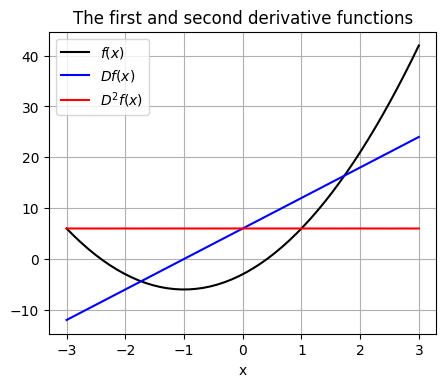

In [21]:
c = 0

fig,ax = plt.subplots(1,1,figsize=(5,4),dpi=100)
x_ = np.linspace(c-3,c+3)
ax.plot(x_,f(x_),color="black",label=r"$f(x)$")
ax.plot(x_,D(f,x_),color="blue",label=r"$Df(x)$")
ax.plot(x_,D(lambda x: D(f,x),x_,1e-4),color="red",label=r"$D^2f(x)$")
ax.grid()
ax.set_title("The first and second derivative functions")
ax.set_xlabel("x")
ax.legend()
plt.show()

### $k$-times differentiability

We generalize the concept of differentiability in a recursive manner.

Let $f\in\mathcal{C}^{k-1}$ for some neighborhood $U$ of a point $c$ and define $g:U\rightarrow\mathbb{R}$ as $g(x)=d^{k-1}f(x;u)$ for all $u\in\mathbb{R}$ such taht $x+u\in U$. If $g$ is differentiable at $c$ then $f$ is said to be **$k$ times differentiable** at $c$ and the **$k$-th differential** of $f$ at $c$ with increment $u$ is defined as $dg(c;u)$. Thus,

$$d^kf(c;u) = d(d^{k-1}f)(c;u)$$

Let $D^k = D\circ\cdots\circ D$ ($k$-times) and define $D^kf(c)$ as the **$k$-th derivative** of $f$ at $c$. Hence, it can be proven that

$$d^kf(c;u) = D^kf(c)u^k$$

In other words, the $k$-th differential is a $k$-linear map on $u$.

**Note**: If a function $f$ is $k$-times continuously differentiable for all $k\in\mathbb{N}$ we say that $f$ is $\infty$-times continuously differentiable and denote it by $f\in\mathcal{C}^\infty$

### Taylor's theorem

Let $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ be $k$-times continuously differentiable at some neighborhood $U\subset\Omega$ of a point $c\in\Omega$. Then, for all $u\in\mathbb{R}$ such that $x+u\in U$ there exists a function $r_c:\mathbb{R}\rightarrow\mathbb{R}$ called **reminder** such that

$$f(c+u) = f(c) + \sum_{n=1}^k\frac{1}{n!}d^kf(c;u) + r_c(u)$$
$$\lim_{u\rightarrow0}\frac{r_c(u)}{u^k}$$

This theorem states that under certain conditions of continuous differentiability, a function can be approximated in a neighborhood with a combination of multilinear mappings given by the differentials of such function (by ignoring the reminder). This structure is called the **$k$-th order Taylor polynomial**.

For example, the $sin$ function is $\mathcal{C}^\infty$ on $0$ (actually, it can be extended to all its domain, but more on that later). Thus, let's create a function that returns the $k$-th order Taylor polynomial for a neighbor $u$ of $0$ and see how good the approximation is. 

In [22]:
def taylor_sin(c,u,k=10):
    assert k >= 1
    x = c + u
    coefs = np.array(list(map(factorial,2*np.arange(k)+1)))
    vals = np.vander(np.array(x).reshape(-1),2*k)[:,::-1][:,2*np.arange(k)+1]
    signs = np.vander([-1],k)[:,::-1]
    return np.sum(signs*vals/coefs,axis=1)

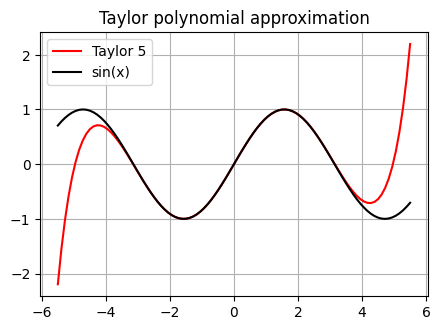

In [23]:
k = 5
c = 0
u = np.linspace(-5.5,5.5,100)

fig,ax = plt.subplots(figsize=(5,3.5),dpi=100)
ax.plot(u,taylor_sin(c,u,k),color="red",label=f"Taylor {k}")
ax.plot(u,np.sin(u),color="black",label=r"sin(x)")
ax.set_title("Taylor polynomial approximation")
ax.legend()
ax.grid()
plt.show()

### The differential form for the reminder
As a consequence of the mean value theorem, it can be proven that if $f\in\mathcal{C}^{k+1}$ on a neighborhood $U$ of a point $c$ then for all $u\in\mathbb{R}$ such that $c+u\in U$ there exists a value $\xi\in\text{int}(U)$ such that
$$f(c+u) = f(c) + \sum_{n=1}^k\frac{1}{n!}d^nf(c;u) + \frac{1}{(k+1)!}d^{k+1}f(\xi;u)$$

### The integral form for the reminder

It can be proven that if $f\in\mathcal{C}^{k+1}$ on a neighborhood $U$ of a point $c$ then for all $u\in\mathbb{R}$ such that $c+u\in U$ and if $D^{k}f$ is **absolutely continuous** in the closed set $[c,c+u]$ then
$$f(c+u) = f(c) + \sum_{n=1}^k\frac{1}{n!}d^nf(c;u) + \int_c^{c+u}\frac{1}{k!}d^{k+1}f(x;c-x)dx$$

**Note**: Absolute continuity is out of the reach of this notebook.

In [24]:
def d_k_sin(c,u,k):
    assert k >= 1
    if   k%4==0: return np.sin(c)*u**k
    elif k%3==0: return -np.cos(c)*u**k
    elif k%2==0: return -np.sin(c)*u**k
    else:        return np.cos(c)*u**k

def taylor_int_sin(c,u,k):
    poly =  taylor_sin(c,u,k)
    rem = integrate.quad(lambda x: d_k_sin(x,c-x,k+1),c,c+u)[0]/factorial(k)
    return poly + rem

In [25]:
c = 0.3
u = 0.05
k = 5

print(f"sin(x) = {np.sin(c+u)}\nTaylor poly = {taylor_sin(c,u,k)[0]}\nTaylor Int Form: {taylor_int_sin(c,u,k)[0]}") 

sin(x) = 0.34289780745545134
Taylor poly = 0.342897807455693
Taylor Int Form: 0.34289780745481735


It can be proven that if $f:\Omega\subset\mathbb{R}\rightarrow\mathbb{R}$ such that $f\in\mathcal{C}^{\infty}$ on all its domain, then for all $c\in\Omega$ and for any $u\in\mathbb{R}$ such that $c+u\in\Omega$,

$$f(c+u) = f(c) + \sum_{n=1}^{\infty}\frac{1}{n!}d^nf(c;u)$$

This is called the **Maclaurin series** for $f$ and thus, $f$ is **analytical** as it can be expanded as an infinite power series.

## Differentiability of functions $\mathbb{R}^n\rightarrow\mathbb{R}^m$

Now, it is time to generalize the ideas discussed above into spaces of greater dimension.

THIS is the actual differential calculus that has uncountable applications, as it is general enough to extend into more sophisticated finite dimensional vector spaces due to the fact that 

$$V\cong W\Leftrightarrow\dim V = \dim W $$

Nevertheless, the intuition behind depends a lot of understanding the theory for $\mathbb{R}\rightarrow\mathbb{R}$ functions, so this is the reason I introduced a lot of concepts in the last section.

### Partial derivatives

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ be cnontinuous at some point $c\in\Omega$ and $f_1,\dots,f_m:\Omega\rightarrow\mathbb{R}$ be the component functions of $f$. If $e_1,\dots,e_n$ denotes the canonical basis of $\mathbb{R}^n$ and $\varepsilon_1,\dots,\varepsilon_m$ the canonical basis of $\mathbb{R}^m$, the **partial derivative** of $f$ with respect to the $j$-th variable at $c$ is defined as

$$\lim_{h\rightarrow 0}\frac{f(c+he_j)-f(c)}{h} = \sum_{i=1}^m\lim_{h\rightarrow 0}\frac{f_i(c+he_j)-f_i(c)}{h}\varepsilon_i$$

We will express such relation by using the following notation

$$D_jf(c) = \sum_{i=1}^mD_jf_i(c)\varepsilon_i$$

**Note**: We use this notation on purpose, as it generalizes naturally with the derivative definition in this new vector spaces.

In [26]:
def partial(f,x,j,m,prec=1e-6):
    return (f(x+prec*np.eye(m)[j,:]) - f(x))/prec

In [27]:
A = np.array([[11,12],[21,22]])
def f(x):
    return np.dot(A,x)

In [28]:
partial(f,np.array([2,3]),0,2)

array([11., 21.])

### Definition

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ be a continuous function in a neighborhood $U\subset\Omega$ of a point $c\in U$. 

We say that $f$ is differentiable at $c$ if and only if $\forall u\in\mathbb{R}^n:u\neq0\land c+u\in U$ there exists a linear transformation $\Phi:\mathbb{R}^n\rightarrow\mathbb{R}^m$ on $u$ such that
$$f(c+u) = f(c) + \Phi(u) + r_c(u)$$
$$\lim_{u\rightarrow 0}\frac{r_c(u)}{\|u\|} = 0$$

If $e_1,\dots,e_n$ and $\varepsilon_1,\dots,\varepsilon_m$ denote the canonical basis of $\mathbb{R}^n$ and $\mathbb{R}^m$ respectively, see that under the basis expansion of $\Phi$,

$$\Phi(u) = \sum_{j=1}^n\sum_{i=1}^mu_j\phi^{i}_j\varepsilon_i$$

Now, we define the **derivative** of $f$ at $c$ (also called as the **Jacobian matrix**), as the matrix representation of the linear transformation $\Phi$. This is,
$$\begin{pmatrix}\phi^1_1 & \cdots & \phi^1_n\\\vdots & \ddots & \vdots\\\phi^m_1 & \cdots & \phi^m_n\end{pmatrix}\in\mathbb{R}^{m\times n}$$

The **differential** of $f$ at $c$ with increment $u$ is defined as $\Phi(u)$ and it can be **represented** in this case by the matrix-vector product

$$\Phi(u) = \left(\phi^i_j\right)u$$

### What is $\Phi$?

Consider the definition above for the case $u=he_j$ for some $h > 0$. Thus, 
$$\Phi(he_j) = \sum_{k=1}^n\sum_{i=1}^mh\delta_{kj}\phi^i_k = h\sum_{i=1}^m\phi^i_j\varepsilon_i$$

Hence, the differentiability definition takes the form

$$f(c+he_j) = f(c) + h\sum_{i=1}^m\phi^i_j\varepsilon_i + r_c(he_j)$$

$$\lim_{h\rightarrow 0}\frac{f(c+he_j)-f(c)}{h} = \sum_{i=1}^m\phi^i_j\varepsilon_i + \lim_{h\rightarrow 0}\frac{r_c(he_j)}{h}$$

Note that the left side is just $D_jf(c)=\sum_{i=1}^mD_jf_i(c)\varepsilon_i$ and as $\|he_j\| = h$, the second right term vanishes. Thus,

$$\phi^i_j = D_jf_i(c)$$

**Note**: This makes a lot of sense, as $\phi_j$ is just a function of $e_j$ and the definition of $D_jf(c)$ depends on the choice of $e_j$.

Hence, the derivative of $f$ at $c$ is just a matrix of all partial derivatives from the component functions aranged in a specific order. We denote such matrix as follows

$$Df(c) = \begin{pmatrix}D_1f_1(c) & \cdots & D_nf_1(c)\\\vdots & \ddots & \vdots\\D_1f_m(c) & \cdots & D_nf_m(c)\end{pmatrix}$$

Therefore, if we denote the differential of $f$ at $c$ with increment $u$ as $df(c;u)$ see that

$$df(c;u) = Df(c)u$$

Note that the differential a function $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ can be seen as a linear combination of the differentials of the component functions $f_1,\dots,f_m:\Omega\rightarrow\mathbb{R}$

$$df_i(c;u) = \sum_{j=1}^nD_jf_i(c)u_j$$

$$df(c;u) = \sum_{i=1}^m \left(\sum_{j=1}^nD_jf_i(c)u_j\right)\varepsilon_i = \sum_{i=1}^ndf_i(c;u)\varepsilon_i$$

From this result, we can derive new theorems in the *"multivaraite"* context by applying tools developed on the *"univariate"* context.

### Some useful properties

Let $f,g:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ be differentiable functions at $c\in\Omega$ and $\lambda\in\mathbb{R}$, $A\in\mathbb{R}^{p\times m}$.

* $d(f+g)(c;u) = df(c;u) + dg(c;u)$
* $d(\lambda f)(c;u) = \lambda df(c;u)$
* $d(Af)(c;u) = Adf(c;u)$


### The gradient

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}$ be differentiable at $c\in\Omega$ and $e_1,\dots,e_n$ be the canonical basis of $\mathbb{R}^n$. The **gradient** of $f$ at $c$ is defined as

$$\nabla f(c) = \sum_{j=1}^nD_jf(c)e_j = Df(c)^T$$

### Change of coordinates

A **diffeomorphism** is a function that is bijective and differentiable, with differentiable inverse.

Let $\Omega,\Omega'\subset\mathbb{R}^n$ and $\phi:\Omega\rightarrow\Omega'$ be a diffeomorphism such that $\det(D\phi(x)) \neq0$ for all $x\in\Omega$. Then, $\phi$ is said to be a **change of coordinates** between $\Omega$ and $\Omega'$.

This idea allows (in some sence) to transform a problem from one representation into another one, which in some cases, may result in a simpler problem. In particular, if $f:\Omega'\rightarrow\mathbb{R}^m$ is integrable on a region $\omega\subset\Omega'$ then

$$\int_{\omega}f = \int_{\phi^{-1}(\omega)}(f\circ\phi)|\det(D\phi)|$$

### The second differential

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ such that $f\in\mathcal{C}^1$ in a neighborhood $U$ of a point $c\in\Omega$. Define $g:U\rightarrow\mathbb{R}^m$ as $g(x)=df(x;u)$ for all $u\in\mathbb{R}^n$ such that $x+u\in U$. If $g$ is differentiable at $c$ then, the second differential of $f$ at $c$ with increment $u$ is given by $dg(c;u)$. Thus,

$$d^2f(c;u) = \sum_{i=1}^mdg_i(c;u)\varepsilon_i = \sum_{i=1}^m\sum_{j_2=1}^nu_{j_2}D_{j_2}g_i(c)\varepsilon_i = \sum_{i=1}^m\sum_{j_2=1}^nu_{j_2}D_{j_2}\left(\sum_{j_1=1}^nu_{j_1}D_{j_1}f_i\right)(c)\varepsilon_i = \sum_{j_1=1}^n\sum_{j_2=1}^n\sum_{i=1}^mu_{j_1}u_{j_2}D_{j_1,j_2}^2f_i(c)\varepsilon_i $$

Hence, the second differential is a bilinear mapping $\mathbb{R}^n\times\mathbb{R}^n\rightarrow\mathbb{R}^m$ on $u$ two times. And the transformation is represented under the second partial derivatives of $f$ at $c$.

When $m=1$, define the **Hessian matrix** as

$$Hf(c) = \begin{pmatrix}D_{1,1}^2f(c) & \cdots & D_{1,n}^2f(c)\\\vdots & \ddots & \vdots\\D_{n,1}^2f(c) & \cdots & D_{n,n}^2f(c)\end{pmatrix}$$

Thus, the second differential can be expressed as the vector-matrix-vector product

$$d^2f(c;u) = u^THf(c)u$$

Now, if $m>0$, the second differential is commonly expressed as

$$d^2f(c;u) = \sum_{i=1}^mu^THf_i(c)u\varepsilon_i$$

### The $k$-th differential

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ such that $f\in\mathcal{C}^{k-1}$ in a neighborhood $U$ of a point $c\in\Omega$. Define $g:U\rightarrow\mathbb{R}^m$ as $g(x)=d^{k-1}f(x;u)$ for all $u\in\mathbb{R}^n$ such that $x+u\in U$. If $g$ is differentiable at $c$ then, the $k$-th differential of $f$ at $c$ with increment $u$ is given by $dg(c;u)$. Thus,

$$d^kf(c;u) = \sum_{i=1}^md\left(d^{k-1}f_i\right)(c;u)\varepsilon_i$$

Hence, it can be proven recursively that

$$d^kf(c;u) = \sum_{j_1=1}^n\cdots\sum_{j_k=1}^n\sum_{i=1}^mu_{j_1}\cdots u_{j_k}D^k_{j_1,\dots,j_k}f_i(c)\varepsilon_i$$

Thus, the $k$-th differential is a $k$-linear mapping $\mathbb{R}^n\times\cdots\times\mathbb{R}^n\rightarrow\mathbb{R}^m$ on $u$, $k$ times. This is represented as a combination of all $k$-th order partial derivatives of the component functions of $f$.

### Taylor's theorem

Let $f:\Omega\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ be $k$-times continuously differentiable at some neighborhood $U\subset\Omega$ of a point $c\in\Omega$. Then, for all $u\in\mathbb{R}^n$ such that $x+u\in U$ there exists a function $r_c:\mathbb{R}^n\rightarrow\mathbb{R}^m$ called **reminder** such that

$$f(c+u) = f(c) + \sum_{j=1}^k\frac{1}{j!}d^jf(c;u) + r_c(u)$$
$$\lim_{u\rightarrow0}\frac{r_c(u)}{\|u\|^k}$$


## Matrix differential calculus

### Vectorization

Let $\mathcal{A}^k(n_1,\dots,n_k)$ be the space of $k$-dimensional arrays of shape $(n_1,\dots,n_k)$. A **vectorization** is a bijective mapping $\mathcal{A}^k(n_1,\dots,n_k)\rightarrow\mathcal{A}^1(n_1\cdots n_k)$. Note that given two vectorizations $\phi,\psi$ on $\mathcal{A}^k(n_1,\dots,n_k)$, we can always define a permutation mapping $\pi$ on $\mathcal{A}^1(n_1\cdots n_k)$ such that for all $x\in \mathcal{A}^k(n_1,\dots,n_k)$, $(\pi\circ\phi)(x) = \psi(x)$ with inverse $\pi^{-1}=\pi\circ\pi$ such that $(\pi^{-1}\circ\psi)(x) = \phi(x)$. Thus, all the vectorizations are equivalent.

In the particular case of real matrices of size $m\times n$, denoted by $\mathbb{R}^{m\times n}$, define the vectorizations $\text{vec},\text{vech}:\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{mn}$ such that for all $A\in\mathbb{R}^{m\times n}$,

$$A_{i,j}\mapsto(\text{vec}\ A)_{i+jm}$$
$$A_{i,j}\mapsto(\text{vech}\ A)_{in+j}$$

It is easy to see that

$$\text{vech}\ A = \text{vec}(A^T)$$

Let $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ and define $\text{vec}f:\mathbb{R}^{mn}\rightarrow\mathbb{R}^{pq}$ such that for all $x\in\Omega$
$$\text{vec}\ f(x) =\text{vec}f(\text{vec}\ x)$$

In [29]:
def vec(x):
    return (x.T).reshape(-1,1)

In [31]:
A = np.eye(5)
vec(A).T

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1.]])

### The Kronecker product

The Kronecker product is a matrix-matrix operation $\otimes:\mathbb{R}^{m\times n}\times\mathbb{R}^{p\times q}\rightarrow\mathbb{R}^{mp\times nq}$ such that for all $A\in\mathbb{R}^{m\times n}$ and $B\in\mathbb{R}^{p\times q}$,

$$A\otimes B = \begin{pmatrix}A_{1,1}B & \cdots & A_{1,n}B\\\vdots&\ddots&\vdots\\A_{m,1}B&\cdots&A_{m,n}B\end{pmatrix}$$

There is a natural and very useful connection between the $\text{vec}$ vectorization and the Kronecker product. Let $A,B,C$ be matrices such that the product $ABC$ is well defined, then

$$\text{vec}(ABC) = (C^T\otimes A)\text{vec}\ B$$

In [2]:
from numpy import kron

In [36]:
A = np.diag([1,2,3])
B = np.arange(1,7).reshape(3,2)
kron(A,B)

array([[ 1,  2,  0,  0,  0,  0],
       [ 3,  4,  0,  0,  0,  0],
       [ 5,  6,  0,  0,  0,  0],
       [ 0,  0,  2,  4,  0,  0],
       [ 0,  0,  6,  8,  0,  0],
       [ 0,  0, 10, 12,  0,  0],
       [ 0,  0,  0,  0,  3,  6],
       [ 0,  0,  0,  0,  9, 12],
       [ 0,  0,  0,  0, 15, 18]])

### The intuitive generalization of the definition

Let $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ be a continuous function in a neighborhood $U\subset\Omega$ of a point $c\in U$. 

We say that $f$ is differentiable at $c$ if and only if $\forall u\in\mathbb{R}^{m\times n}:u\neq0\land c+u\in U$ there exists a linear transformation $\Phi:\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ on $(u)$ such that
$$f(c+u) = f(c) + \Phi(u) + r_c(u)$$
$$\lim_{u\rightarrow 0}\frac{r_c(u)}{\|u\|} = 0$$

If $e_{1,1},\dots,e_{m,n}$ and $\varepsilon_{1,1},\dots,\varepsilon_{p,q}$ are the canonical basis of $\mathbb{R}^{m\times n}$ and $\mathbb{R}^{p\times q}$ respectively, the basis expansion of $\Phi$ is given by

$$\Phi(u) = \sum_{i=1}^p\sum_{j=1}^q\sum_{r=1}^m\sum_{s=1}^nu_{r,s}\phi^{i,j}_{r,s}\varepsilon_{i,j}$$

where $\Phi(e_{r,s}) = \sum_{i=1}^p\sum_{j=1}^q\phi^{i,j}_{r,s}\varepsilon_{i,j}$.

### The equivalent and more useful definition

We could continue the theory like this, but we can struggle a lot in understanding what the derivative is in such spaces, and more important, we would need to develop some new (and probably) unfamiliar algebra (a sort of generalization of matrix algebra) to address such problem. Instead, we will use an isomorphism between matrices and vectors to get an equivalent definition, but in the vector context instead (which we already know from last section)

As $\mathbb{R}^{m\times n}\cong\mathbb{R}^{mn}$ and $\mathbb{R}^{p\times q}\cong\mathbb{R}^{pq}$ under the $\text{vec}$ mapping in both spaces, there must exist an equivalent linear mapping $\bar\Phi:\mathbb{R}^{mn}\rightarrow\mathbb{R}^{pq}$ on $\text{vec}\ U$ such that

$$\text{vec}\ f(c+u) = \text{vec}\ f(c) + \bar\Phi(\text{vec}\ u) + \text{vec}\ r_c(u)$$

See that if we define $\bar e_1,\dots,\bar e_{mn}\in\mathbb{R}^{mn}$ and $\bar\varepsilon_1,\dots,\bar\varepsilon_{pq}\in\mathbb{R}^{pq}$ such that

$$\bar e_{i+jm} = \text{vec}\ e_{i,j}$$
$$\bar\varepsilon_{i+jm} = \text{vec}\ \varepsilon_{i,j}$$

Then, the basis expansion of $\Phi$ is simply given by

$$\Phi(\text{vec}\ u) = \sum_{i=1}^{pq}\sum_{j=1}^{mn}(\text{vec}\ u)_j\phi^i_j\bar\varepsilon_i$$

where $\Phi(\bar e_j) = \sum_{i=1}^{pq}\phi^i_j\bar\varepsilon_i$

From the differentiation theory for functions $\mathbb{R}^n\rightarrow\mathbb{R}^m$ that we developed in last section we conclude that
$$\bar\phi^i_j = D_j(\text{vec}f)_i$$

Hence, the **derivative** of $\text{vec}f$ at $\text{vec}\ c$ is defined as

$$D\text{vec}f(\text{vec}\ c) = \begin{pmatrix}D_1(\text{vec}f)_1(\text{vec}\ c)&\cdots&D_{mn}(\text{vec}f)_1(\text{vec}\ c)\\\vdots&\ddots&\vdots\\D_1(\text{vec}f)_{pq}(\text{vec}\ c)&\cdots&D_{mn}(\text{vec}f)_{pq}(\text{vec}\ c)\end{pmatrix}\in\mathbb{R}^{pq\times mn}$$

and the differential of $\text{vec}f$ at $\text{vec}\ c$ with increment $\text{vec}\ u$ is defined as

$$d\text{vec}f(\text{vec}\ c;\text{vec}\ u) = D\text{vec}f(\text{vec}\ c) \text{vec}\ u$$

**Note**: This ideas of vectorizing a matrix function and defining its differentiation theory using the classic multivariate calculus can be extended to any other multidimensional array differentiable space, we only need to define a vectorization and proceed similarly.

**Note**: The relation between tha linear mappings must be
$$\text{vec}\ \Phi(u) = \bar\Phi(\text{vec}\ u)$$

In [81]:
def D(f,x,prec=1e-6):
    y = f(x)
    deriv = np.zeros((y.size,x.size))
    for k in range(x.size):
        j = int(k/x.shape[0])
        i = k%x.shape[0]
        e = kron(np.eye(x.shape[0])[:,i:i+1],np.eye(x.shape[1])[:,j:j+1].T)
        deriv[:,k] = (vec(f(x+prec*e) - f(x))/prec).reshape(-1)
    return deriv

def d(f,x,u,prec=1e-6):
    return D(f,x,prec) @ vec(u)

In [82]:
A = np.array([[1,2,3],[4,5,6]])
f = lambda x: A @ x
D(f,np.arange(6).reshape(3,2))

array([[1., 2., 3., 0., 0., 0.],
       [4., 5., 6., 0., 0., 0.],
       [0., 0., 0., 1., 2., 3.],
       [0., 0., 0., 4., 5., 6.]])

Nevertheless, the original mapping $\Phi$ is still useful in the theory development. And thus, we will focus on it just for a moment.

Let $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ with component functions $f_{i,j}:\Omega\rightarrow\mathbb{R}$ for $i\le m\land j\le n$ be differentiable at $c\in\Omega$. Define the **differential** of $f$ at $c$ with increment $u$ as $df(c;u) = \Phi(u)$. But we know that $\text{vec}\ \Phi(u) = \bar\Phi(\text{vec}\ u)$, thus 

$$\text vec\ df(c;u) = d\text{vec}f(\text{vec}\ c;\text{vec}\ u)$$

And hence, by using the traditional partial derivative notation,

$$df(c;u) = \sum_{i=1}^p\sum_{j=1}^q\sum_{r=1}^m\sum_{s=1}^nu_{r,r}\frac{\partial f_{i,j}}{\partial x_{r,s}}(c)\varepsilon_{i,j}$$

Thus, the differential of each component function is given by

$$df_{i,j}(c;u) = \sum_{r=1}^m\sum_{s=1}^nu_{r,s}\frac{\partial f_{i,j}}{\partial x_{r,s}}(c)$$

In other words, with a fancier notation

$$df(c;u) = \sum_{i=1}^p\sum_{j=1}^qdf_{i,j}(c;u)\varepsilon_{i_1,j_1}$$

### Some useful (basic) properties

Let $f,g$ be differentiable matrix functions at a point $c$. If $A\in\mathbb{R}^{m\times n}$, $\lambda\in\mathbb{R}$ and the following computations are defined

* $d(A)(c;u) = 0$
* $d(\lambda f)(c;u) = \lambda df(c;u)$
* $d(f+g)(c;u) = df(c;u) + dg(c;u)$
* $d(fg)(c;u) = df(c;u)g(c) + f(c)dg(c;u)$

### Strategy to theoretically compute $D\text{vec}f(\text{vec}\ c)$

It can be proven that the derivative of a function $\mathbb{R}^n\rightarrow\mathbb{R}^m$ at $c$ is the unique matrix $A\in\mathbb{R}^{m\times n}$ such that $df(c;u) = Au$. This is called **the derivative identification theorem**.

An application of this theorem appears when we try to determine the derivative of a matrix function analitycally.

First, (if necessary) we compute the differential of each component function $df_{ij}(c;u)$ to construct the differential of $f$, $df(c;u)$ and then, we vectorize it and apply the fact that $\text vec\ df(c;u) = d\text{vec}f(\text{vec}\ c;\text{vec}\ u)$. Then, we try to factor $\text{vec}\ u$ and a matrix $A$ that doesn't depend on $u$ as the product $A\text{vec}\ u$ to finally conclude that $A=D\text{vec}f(\text{vec}\ c)$.

**Example**

Let $A\in\mathbb{R}^{p\times m},B\in\mathbb{R}^{n\times q}$ and $f:\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ such that $f(X) = AXB$. Under a simplified (and more traditional) notation, if we consider $u=dX$ see that

$$df = d(AXB) = d(A)XB + Ad(X)B + AXd(B) = AdXB$$

$$d\text{vec}f = \text{vec}\ df = \text{vec}(AdXB) = (B^T\otimes A)\text{vec}\ dX$$

$$D\text{vec}\ f = B^T\otimes A$$

For the case $B=I_n$ we get the theoretical solution of the last example.

### The second differential

Just as in te past section, if a function $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}^{p\times q}$ is $C^1$ on a neighborhood $U$ of a point $c\in\Omega$, we define the function $g:\Omega\rightarrow\mathbb{R}^{p\times q}$ by $g(c;u) = df(c;u)$ for all $u\in\mathbb{R}^{m\times n}$ such that $c+u\in U$. Now, if $g$ is differentiable at $c$ we define the second differential of $f$ at $c$ as $d^2f(c;u) = dg(c;u)$.

Hence, the second differential of $\text{vec}f$ at $\text{vec}\ c$ with increment $\text{vec}\ u$ is given by

$$d^2\text{vec}f(\text{vec}\ c; \text{vec} u) = \text{vec}\ d^2f(c;u)$$

If $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}$ is twice-differentiable at $c\in\Omega$ then the second differential can be expressed in a special form
$$d^2\text{vec}f(\text{vec}\ c;\text{vec}\ u) = (\text{vec}\ u)^TH\text{vec}\ u$$

Where $H\in\mathbb{R}^{mn\times mn}$ is defined as the Hessian matrix of $\text{vec}f$ at $\text{vec}\ c$ and
$$Hf(c;u) = D^2\text{vec}f(\text{vec}\ c)$$

There is a very useful theorem to determine the Hessian matrix. Under a simplified notation, if $f:\Omega\subset\mathbb{R}^{m\times n}\rightarrow\mathbb{R}$ is twice differentiable at a point $c$ then
$$df(c) = \text{tr}\ A(dX)^TBdX \Leftrightarrow Hf(c) = \frac{1}{2}(A^T\otimes B + A\otimes B^T)$$
$$df(c) = \text{tr}\ AdXBdX \Leftrightarrow Hf(c) = K_{m,n}\frac{1}{2}(A^T\otimes B + B^T\otimes A)$$

where $K_{m,n}$ is the $m,n$-commutation matrix.

### Applications

With very simple computations using matrix differential calculus, it can be proven that if $\mathcal{L}:\mathbb{R}^{m\times n}\rightarrow\mathbb{R}$ is the negative log-likelihood for the multinomial logistic regression model, given by

$$\mathcal{L}(W) = \sum_{i=1}^N\mathbb{H}_{ce}\left(y_i,\mu_i\right)$$

where $\mathbb{H}_{ce}(a,b) = \sum_{j=1}^ma^j\log b^j$ is the cross-entropy of $a,b\in\mathbb{R}^m$ (in this notation, superindices denote the component of a vector, and subindices denote the $i$-th observation) and $\mu_i = \text{softmax}(Wx_i)$ such that $\text{softmax}_j:\mathbb{R}^m\backslash\{0\}\rightarrow\mathbb{R}$ are the $m$ component functions of $\text{softmax}$, given by $\text{softmax}_j(a) = \exp{a^j} / \sum_{k=1}^m\exp{a^k}$

Then, if $w=\text{vec}\ W$ and use $\mathcal{L}$ as $\text{vec}\ \mathcal{L}$ for notation simplicity

$$D\mathcal{L}(w) = \sum_{i=1}^N(\mu_i-y_i)^T\otimes x_i^T$$
$$D^2\mathcal{L}(w) = \sum_{i=1}^N\left(\text{diag}(\mu_i)-\mu_i\mu_i^T\right)\otimes\left(x_ix_i^T\right)$$

These explicit formulas are very useful to train a multinomial regression model. Nevertheless, old-fashion ways (non-matrix differential calculus) to determine them analytically could be extremely tedious.